In [1]:
import pandas as pd
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

file_train_text = "../../data/training_text/training_text"
file_train_variant = "../../data/training_variants/training_variants"

In [3]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

<ipython-input-3-3e3a854a5c64>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_text = pd.read_csv(file_train_text, sep = '\|\|')


In [5]:
train_text.head(1)

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...


In [6]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [ ]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [ ]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

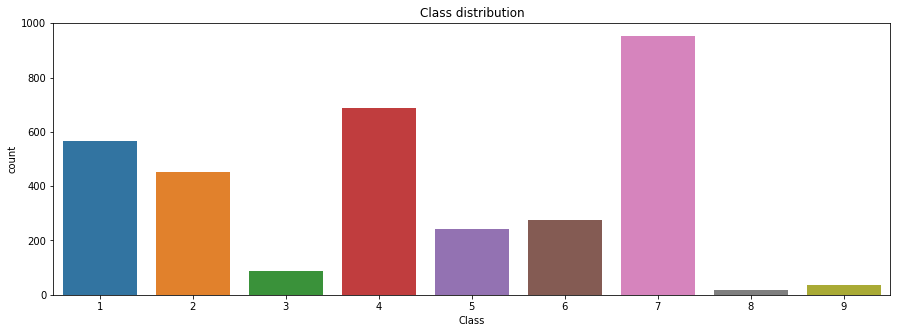

In [229]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

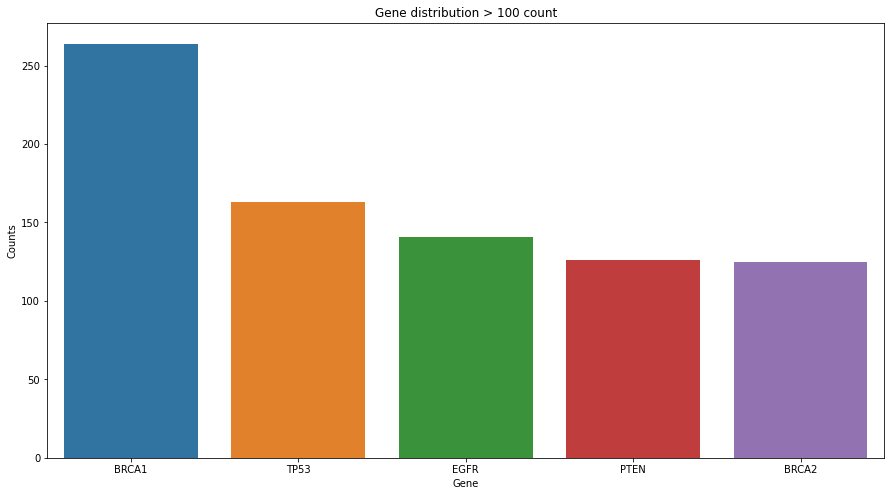

In [240]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

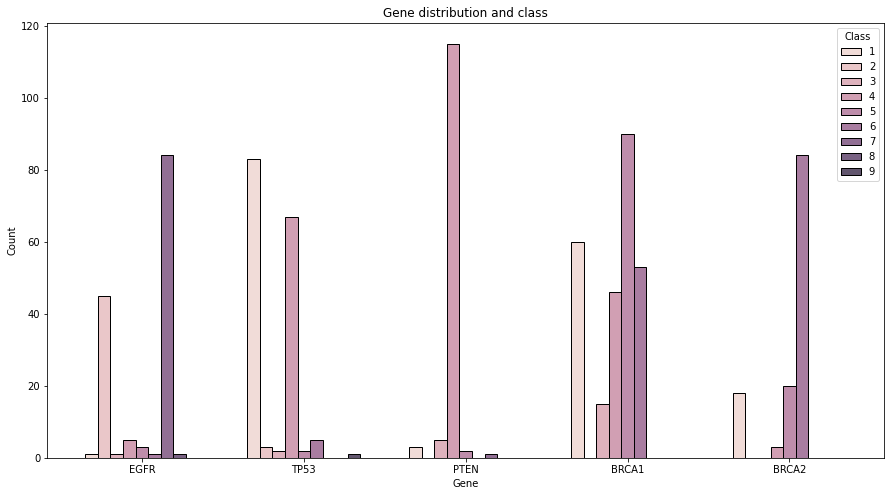

In [244]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [248]:
train_variant[train_variant.Class == 1]

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
7,CBL,Deletion,1
16,CBL,Truncating Mutations,1
37,DICER1,D1709E,1
38,DICER1,D1709A,1
...,...,...,...
3306,RUNX1,W279*,1
3307,RUNX1,Truncating Mutations,1
3309,RUNX1,D171G,1
